In [159]:
# Import dependecies

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn.metrics import confusion_matrix, accuracy_score

In [154]:
df = pd.read_excel('Resources/tracks_tavern_sales_data.xlsx')
df.head()

,item,item_code,quantity,unit_price,total_sales_amount,date,type
0,pint spotted cow,3140,64.0,3.937500,252.00,2021-01-08,beer
1,dbl rail vodka,3455,37.0,4.945946,183.00,2021-01-08,vodka
2,bottle miller high life,3122,31.0,3.250000,100.75,2021-01-08,beer
3,pint stein,3141,29.0,3.517241,102.00,2021-01-08,beer
4,shot seagrams vo,3325,26.0,2.423077,63.00,2021-01-08,scotch/whiskey


In [155]:
df['date'] = pd.to_datetime(df['date'])
df.dtypes

item                          object
item_code                      int64
quantity                     float64
unit_price                   float64
total_sales_amount           float64
date                  datetime64[ns]
type                          object
dtype: object

In [156]:
main_types = ['beer', 'vodka', 'scotch/whiskey', 'nonalcoholic', 'side', 'appetizers', 'fish', 'special']

# Create Food DF

In [161]:
beer_df = df[(df.type == "beer" )].drop(columns=['item', 'item_code', 'unit_price','type', 'total_sales_amount'])
beer_df = beer_df.groupby(['date']).sum().rename(columns={'quantity': 'beer_qty'})
beer_df.head()

,beer_qty
date,
2019-02-15,288.0
2019-02-22,587.0
2019-03-01,658.0
2019-03-08,640.0
2019-03-15,633.0


In [190]:
#Vodka DF
vodka_df = df[(df.type == "vodka" )].drop(columns=['item', 'item_code', 'unit_price','type', 'total_sales_amount'])
vodka_df = vodka_df.groupby(['date']).sum().rename(columns={'quantity': 'vodka_qty'})

#Scotch Whiskey DF
scotch_df = df[(df.type == 'scotch/whiskey' )].drop(columns=['item', 'item_code', 'unit_price','type', 'total_sales_amount'])
scotch_df= scotch_df.groupby(['date']).sum().rename(columns={'quantity': 'scotch_qty'})

# nonalcoholic DF
nonalcoholic_df = df[(df.type == 'nonalcoholic' )].drop(columns=['item', 'item_code', 'unit_price','type', 'total_sales_amount'])
nonalcoholic_df = nonalcoholic_df.groupby(['date']).sum().rename(columns={'quantity': 'nonalcoholic_qty'})

# side
side_df = df[(df.type == 'side' )].drop(columns=['item', 'item_code', 'unit_price','type', 'total_sales_amount'])
side_df = side_df.groupby(['date']).sum().rename(columns={'quantity': 'side_qty'})

# appetizers
apps_df = df[(df.type == 'appetizers' )].drop(columns=['item', 'item_code', 'unit_price','type', 'total_sales_amount'])
apps_df = apps_df.groupby(['date']).sum().rename(columns={'quantity': 'apps_qty'})

# fish
fish_df = df[(df.type == 'fish' )].drop(columns=['item', 'item_code', 'unit_price','type', 'total_sales_amount'])
fish_df = fish_df.groupby(['date']).sum().rename(columns={'quantity': 'fish_qty'})

# special
special_df = df[(df.type == 'special' )].drop(columns=['item', 'item_code', 'unit_price','type', 'total_sales_amount'])
special_df = special_df.groupby(['date']).sum().rename(columns={'quantity': 'special_qty'})


In [191]:
# Join features DF

feature_df = ((((((beer_df.join(vodka_df, how='outer')).join(scotch_df, how='outer'))\
.join(nonalcoholic_df, how = 'outer')).join(side_df, how='outer')).join(apps_df, how='outer'))\
    .join(fish_df, how='outer')).join(special_df, how = 'outer')
feature_df

,beer_qty,vodka_qty,scotch_qty,nonalcoholic_qty,side_qty,apps_qty,fish_qty,special_qty
date,,,,,,,,
2019-02-15,288.0,119.0,87.0,41.0,22.0,40.0,55.0,26.0
2019-02-22,587.0,273.0,175.0,90.0,66.0,141.0,81.0,44.0
2019-03-01,658.0,329.0,232.0,70.0,46.0,124.0,86.0,54.0
2019-03-08,640.0,311.0,205.0,94.0,56.0,157.0,140.0,63.0
2019-03-15,633.0,308.0,187.0,101.0,60.0,146.0,131.0,80.0
...,...,...,...,...,...,...,...,...
2021-08-27,564.0,319.0,167.0,58.0,55.0,108.0,48.0,62.0
2021-09-03,596.0,367.0,176.0,78.0,63.0,114.0,65.0,61.0
2021-09-10,613.0,312.0,253.0,58.0,66.0,119.0,82.0,52.0


In [199]:
# Read Weather DF
cols = ['dt','temp', 'temp_min', 'temp_max']
weather_df = pd.read_csv('Resources/week_weather_summary.csv', index_col=['dt'], usecols=cols)
weather_df.head()

,temp,temp_min,temp_max
dt,,,
2019-02-15,23.368876,-5.10,41.14
2019-02-22,22.586823,0.37,42.76
2019-03-01,15.662619,-8.72,31.91
2019-03-08,34.007813,5.77,62.64
2019-03-15,36.160057,21.74,52.23


In [201]:
weather_df.index = pd.to_datetime(weather_df.index)
weather_df.dtypes

temp        float64
temp_min    float64
temp_max    float64
dtype: object

In [218]:
complete_df = feature_df.join(weather_df, how='outer').reset_index()
complete_df.dropna(inplace=True)
complete_df

,index,beer_qty,vodka_qty,scotch_qty,nonalcoholic_qty,side_qty,apps_qty,fish_qty,special_qty,temp,temp_min,temp_max
0,2019-02-15,288.0,119.0,87.0,41.0,22.0,40.0,55.0,26.0,23.368876,-5.10,41.14
1,2019-02-22,587.0,273.0,175.0,90.0,66.0,141.0,81.0,44.0,22.586823,0.37,42.76
2,2019-03-01,658.0,329.0,232.0,70.0,46.0,124.0,86.0,54.0,15.662619,-8.72,31.91
3,2019-03-08,640.0,311.0,205.0,94.0,56.0,157.0,140.0,63.0,34.007813,5.77,62.64
4,2019-03-15,633.0,308.0,187.0,101.0,60.0,146.0,131.0,80.0,36.160057,21.74,52.23
...,...,...,...,...,...,...,...,...,...,...,...,...
132,2021-08-20,688.0,386.0,287.0,75.0,66.0,150.0,65.0,54.0,75.183600,55.65,94.64
133,2021-08-27,564.0,319.0,167.0,58.0,55.0,108.0,48.0,62.0,73.168103,50.77,93.42
134,2021-09-03,596.0,367.0,176.0,78.0,63.0,114.0,65.0,61.0,66.520357,48.65,81.84
135,2021-09-10,613.0,312.0,253.0,58.0,66.0,119.0,82.0,52.0,67.382024,48.97,87.76


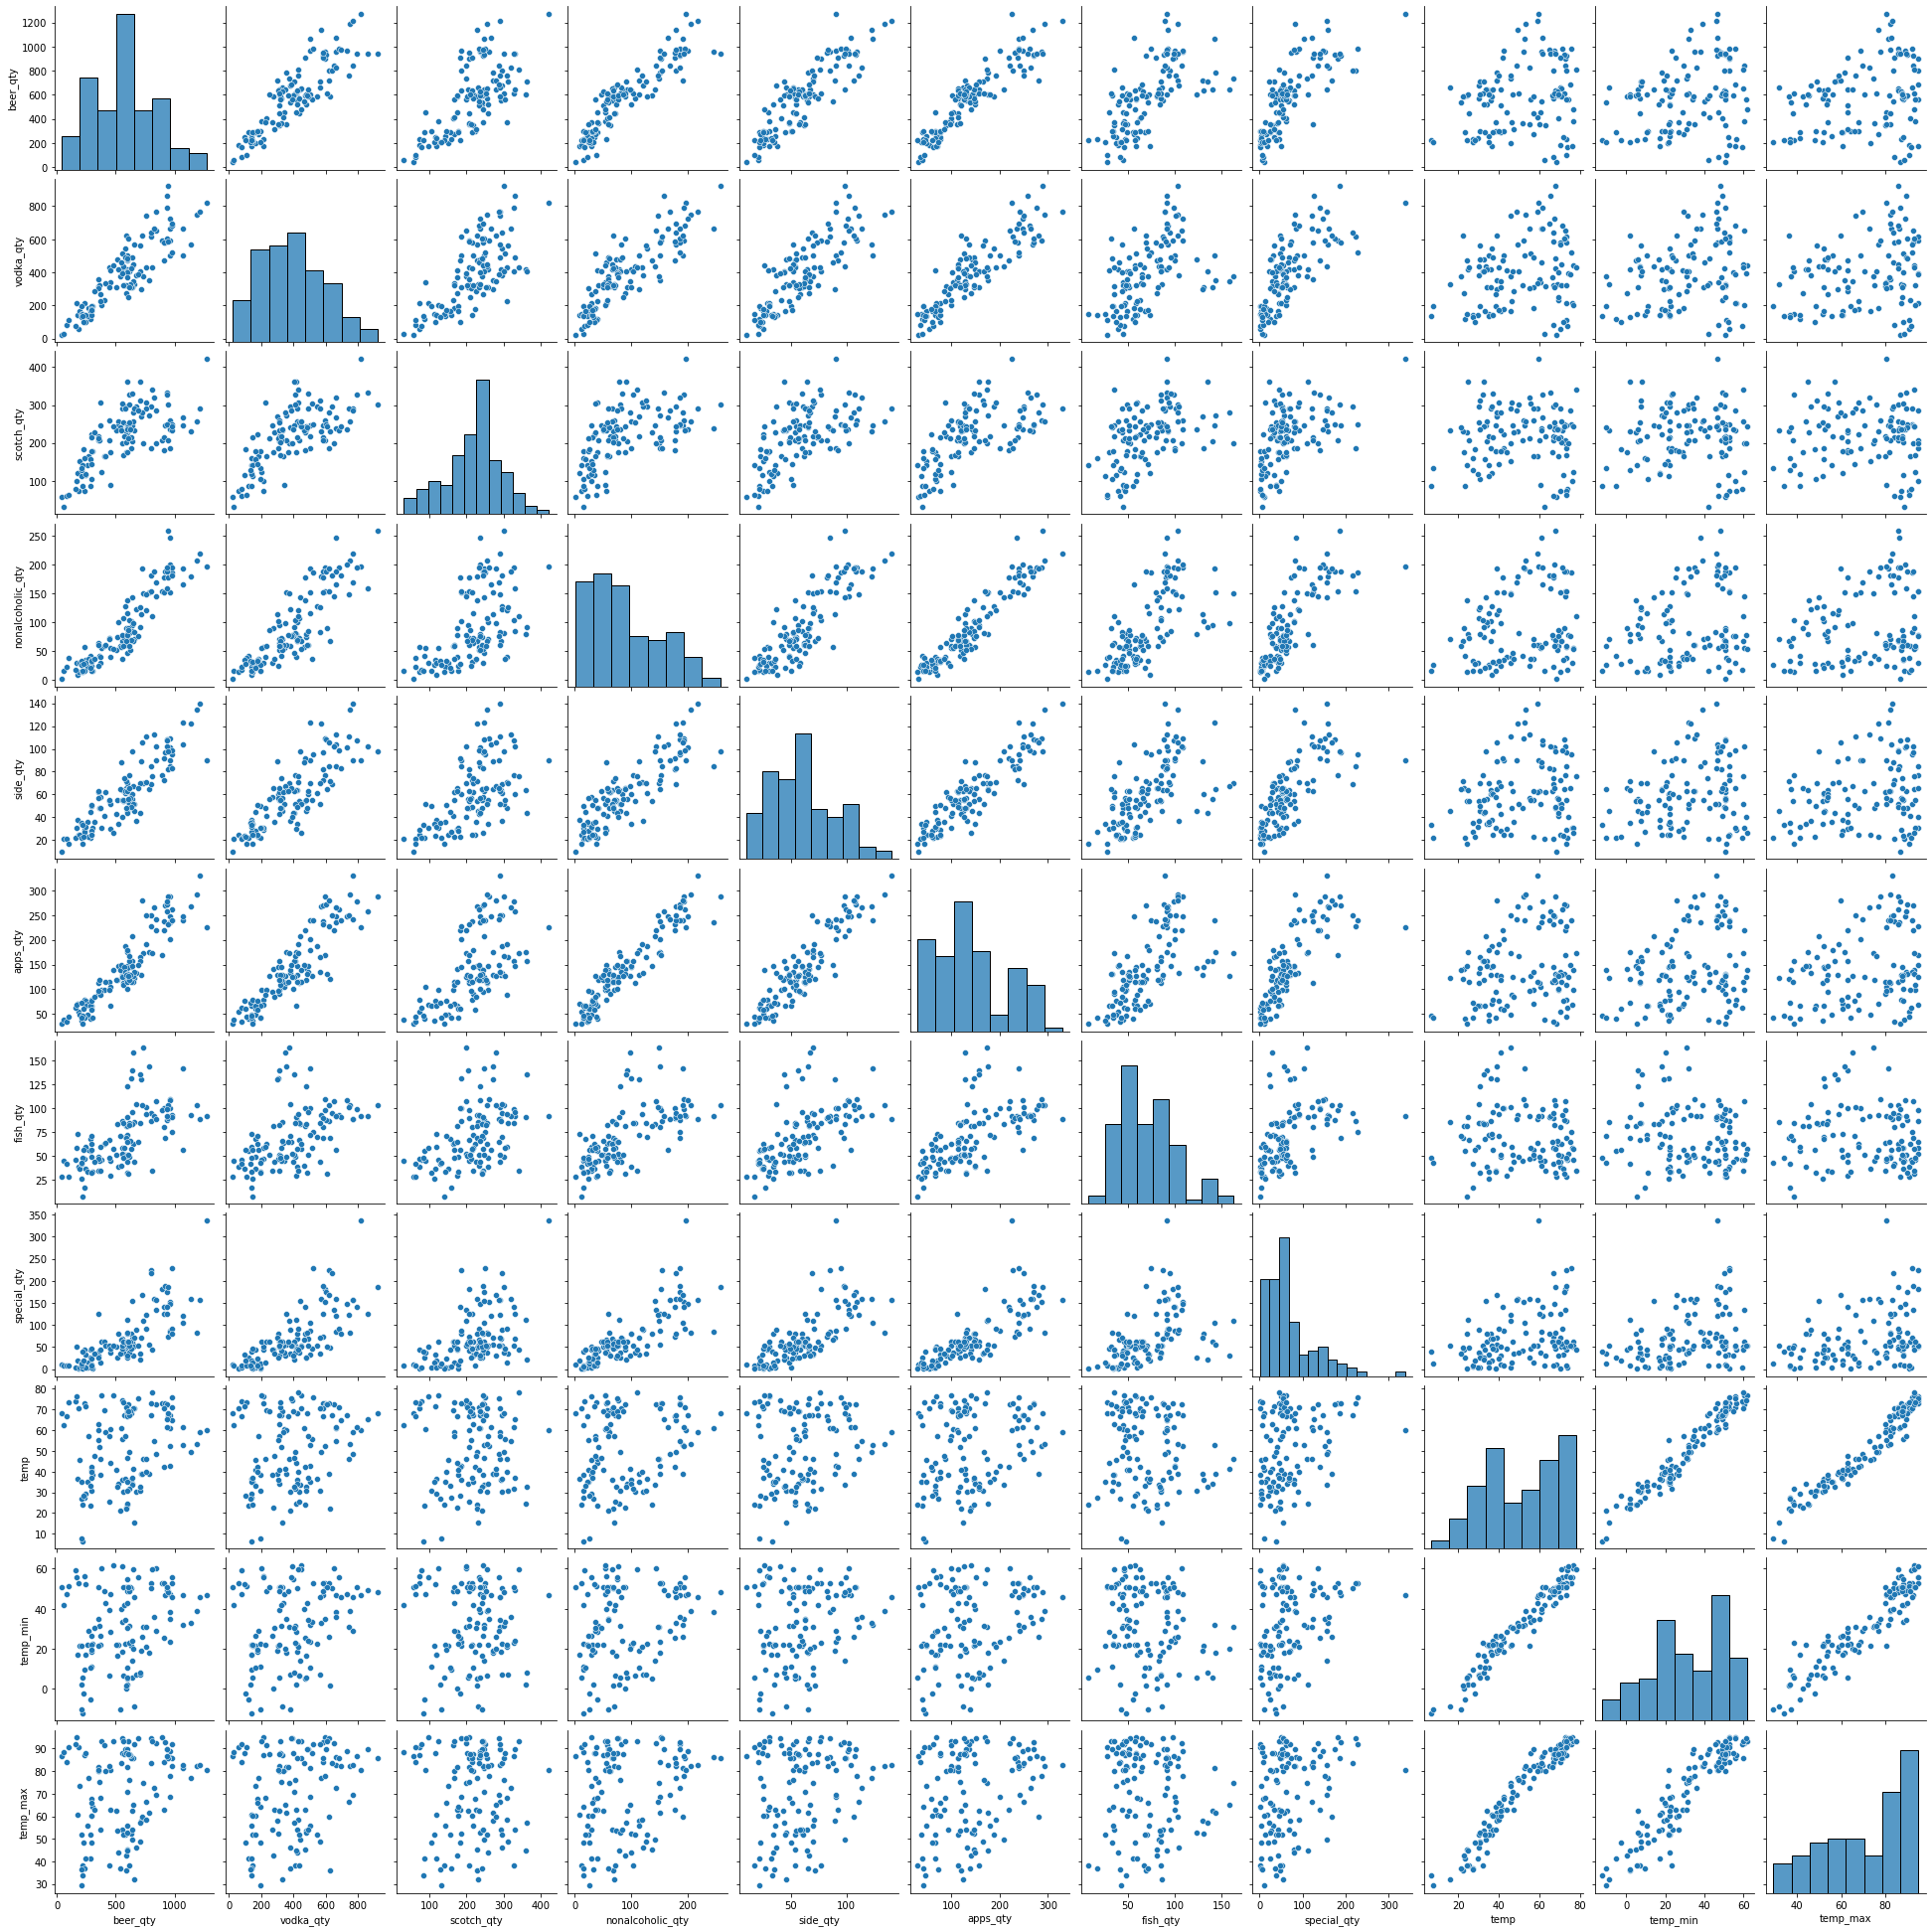

In [219]:
# Plot to verify correlation between variables
sns.pairplot(data=complete_df)

In [220]:
# Verifying correlation
complete_df.corr()

,beer_qty,vodka_qty,scotch_qty,nonalcoholic_qty,side_qty,apps_qty,fish_qty,special_qty,temp,temp_min,temp_max
beer_qty,1.000000,0.883495,0.684408,0.913189,0.883073,0.926176,0.639749,0.765595,0.233688,0.251327,0.266099
vodka_qty,0.883495,1.000000,0.707688,0.859726,0.829167,0.895712,0.498655,0.744107,0.236854,0.261966,0.257113
scotch_qty,0.684408,0.707688,1.000000,0.559884,0.578283,0.632943,0.463653,0.495766,-0.017108,-0.002603,0.006733
nonalcoholic_qty,0.913189,0.859726,0.559884,1.000000,0.860214,0.946059,0.660766,0.798562,0.221430,0.240844,0.238037
side_qty,0.883073,0.829167,0.578283,0.860214,1.000000,0.915945,0.585993,0.728999,0.186324,0.211298,0.228563
apps_qty,0.926176,0.895712,0.632943,0.946059,0.915945,1.000000,0.620943,0.800998,0.250249,0.269222,0.274766
fish_qty,0.639749,0.498655,0.463653,0.660766,0.585993,0.620943,1.000000,0.468105,-0.127418,-0.126434,-0.060830
special_qty,0.765595,0.744107,0.495766,0.798562,0.728999,0.800998,0.468105,1.000000,0.298471,0.312430,0.302157
temp,0.233688,0.236854,-0.017108,0.221430,0.186324,0.250249,-0.127418,0.298471,1.000000,0.972108,0.969901
temp_min,0.251327,0.261966,-0.002603,0.240844,0.211298,0.269222,-0.126434,0.312430,0.972108,1.000000,0.929961


C:\Users\George\anaconda3\envs\mlenv\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


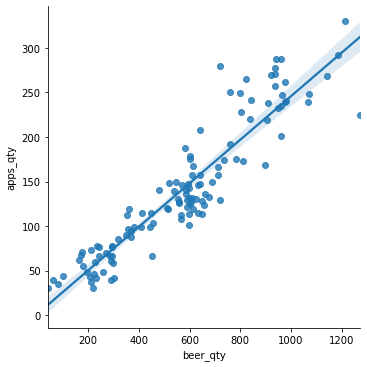

In [221]:
sns.lmplot(x='beer_qty', y='apps_qty', data=complete_df, size=5)

In [224]:
complete_df['month'] = complete_df['index'].apply(lambda time: time.month)

In [225]:
complete_df.head()

,index,beer_qty,vodka_qty,scotch_qty,nonalcoholic_qty,side_qty,apps_qty,fish_qty,special_qty,temp,temp_min,temp_max,month
0,2019-02-15,288.0,119.0,87.0,41.0,22.0,40.0,55.0,26.0,23.368876,-5.10,41.14,2
1,2019-02-22,587.0,273.0,175.0,90.0,66.0,141.0,81.0,44.0,22.586823,0.37,42.76,2
2,2019-03-01,658.0,329.0,232.0,70.0,46.0,124.0,86.0,54.0,15.662619,-8.72,31.91,3
3,2019-03-08,640.0,311.0,205.0,94.0,56.0,157.0,140.0,63.0,34.007813,5.77,62.64,3
4,2019-03-15,633.0,308.0,187.0,101.0,60.0,146.0,131.0,80.0,36.160057,21.74,52.23,3


<AxesSubplot:xlabel='month', ylabel='apps_qty'>

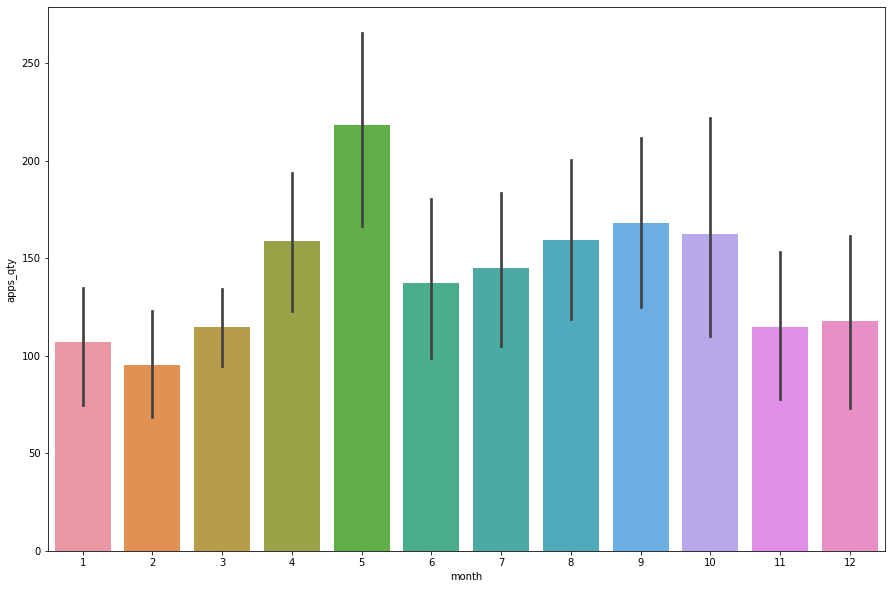

In [229]:
# Visualize beer sales by month
f , ax = plt.subplots(figsize=(15,10))
sns.barplot(x='month', y='apps_qty', data=complete_df)

<AxesSubplot:>

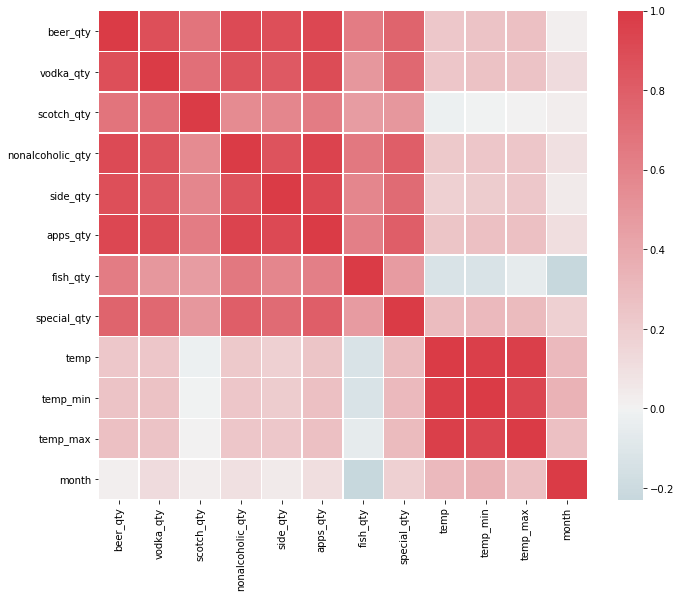

In [231]:
corr = complete_df.corr()
cmap = sns.diverging_palette(220,10, as_cmap=True)
f, ax = plt.subplots(figsize=(11,9))
sns.heatmap(corr, cmap=cmap, center=0, square=True, linewidths=0.5)

In [232]:
# importing stat functions
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [239]:
X = complete_df.drop(['index','beer_qty','temp', 'temp_min', 'temp_max', 'month'], axis=1)
y = complete_df['beer_qty']

In [240]:
# correlation matrix
matrix_corr = X.corr()
print(matrix_corr)

                  vodka_qty  scotch_qty  nonalcoholic_qty  side_qty  apps_qty  \
vodka_qty          1.000000    0.707688          0.859726  0.829167  0.895712   
scotch_qty         0.707688    1.000000          0.559884  0.578283  0.632943   
nonalcoholic_qty   0.859726    0.559884          1.000000  0.860214  0.946059   
side_qty           0.829167    0.578283          0.860214  1.000000  0.915945   
apps_qty           0.895712    0.632943          0.946059  0.915945  1.000000   
fish_qty           0.498655    0.463653          0.660766  0.585993  0.620943   
special_qty        0.744107    0.495766          0.798562  0.728999  0.800998   

                  fish_qty  special_qty  
vodka_qty         0.498655     0.744107  
scotch_qty        0.463653     0.495766  
nonalcoholic_qty  0.660766     0.798562  
side_qty          0.585993     0.728999  
apps_qty          0.620943     0.800998  
fish_qty          1.000000     0.468105  
special_qty       0.468105     1.000000  


In [241]:
XC = sm.add_constant(X)
model_v1 = sm.OLS(y,XC)
model_v2 = model_v1.fit()
model_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               beer_qty   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     153.9
Date:                Thu, 07 Oct 2021   Prob (F-statistic):           1.04e-54
Time:                        22:36:50   Log-Likelihood:                -710.02
No. Observations:                 121   AIC:                             1436.
Df Residuals:                     113   BIC:                             1458.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.8433     29.025     -0.029      0.977     -58.348      56.661
vodka_qty            0.2067      0.106      1.955      0.053      -0.003       0.416
scotch_qty           0.5446      0.164      3.326      0.001       0.220       0.869
nonalcoholic_qty     1.5797      0.455      3.471      0.001       0.678       2.481
side_qty             2.1295      0.713      2.988      0.003       0.717       3.542
apps_qty             0.4199      0.479      0.876      0.383      -0.530       1.369
fish_qty             0.5029      0.377      1.333      0.185      -0.244       1.250
special_qty          0.1279      0.238      0.538      0.592      -0.343       0.599
==============================================================================
Omnibus:                        3.106   Durbin-Watson:                   0.831
Prob(Omnibus):                  0.212   Jarque-Bera (JB):                2.528
Skew:                          -0.292   Prob(JB):                        0.283
Kurtosis:                       3.400   Cond. No.                     1.96e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.96e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [283]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [284]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.9080112647425532

In [285]:
model.coef_

array([0.21705065, 0.54000003, 1.09495382, 1.65076296, 0.53066623,
       0.7279403 , 0.5599868 ])

In [286]:
model.intercept_

7.081699124155875

In [287]:
prediction_df = X_test

In [288]:

prediction_df['y_pred'] = model.predict(X_test)

C:\Users\George\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [290]:
prediction_df_v1 = prediction_df.join(y_test, how='outer')

In [291]:
prediction_df_v1

,vodka_qty,scotch_qty,nonalcoholic_qty,side_qty,apps_qty,fish_qty,special_qty,y_pred,beer_qty
48,623.0,230.0,68.0,72.0,121.0,69.0,49.0,601.693900,588.0
110,228.0,308.0,40.0,48.0,88.0,60.0,14.0,444.138891,368.0
111,174.0,145.0,32.0,51.0,76.0,71.0,24.0,347.830027,293.0
8,504.0,185.0,151.0,90.0,201.0,100.0,86.0,757.898731,962.0
113,284.0,227.0,37.0,36.0,85.0,44.0,35.0,387.980388,316.0
22,619.0,186.0,154.0,85.0,228.0,87.0,224.0,860.573545,803.0
7,376.0,199.0,149.0,70.0,174.0,163.0,110.0,747.443015,737.0
10,470.0,182.0,177.0,92.0,219.0,100.0,140.0,820.460613,907.0
45,500.0,217.0,115.0,70.0,179.0,72.0,32.0,639.580660,600.0
105,198.0,133.0,26.0,22.0,43.0,43.0,12.0,247.503238,208.0


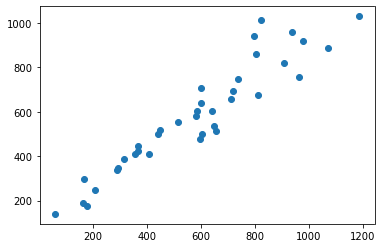

In [292]:
plt.scatter(y_test, y_pred)

(array([ 1.,  2.,  4., 10.,  7.,  2.,  2.,  4.,  3.,  2.]),
 array([-190.16791409, -150.74099578, -111.31407747,  -71.88715916,
         -32.46024085,    6.96667747,   46.39359578,   85.82051409,
         125.2474324 ,  164.67435071,  204.10126902]),
 <BarContainer object of 10 artists>)

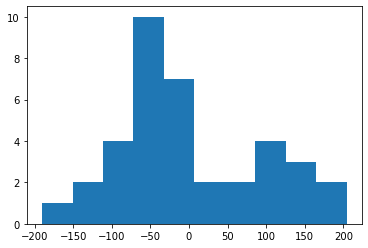

In [293]:
plt.hist(y_test - y_pred)